In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from model.layers import *
from model.optimizer import *
from model.network import *
import random

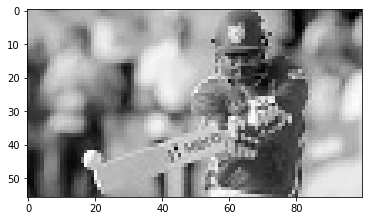

(56, 100)


In [2]:
img=Image.open("5.jpg")
img = img.convert('L')
kiu=np.asarray(img)
imgplot = plt.imshow(kiu,cmap='gray')
plt.show()
print(kiu.shape)

In [3]:
def slicer(img,n_x,n_y):
    #x_strips=math.ceil(n/2)
    #y_strips=n-x_strips
    a,b=img.shape
    x_strip_len=int(a/n_y)
    y_strip_len=int(b/n_x)
    print(x_strip_len,y_strip_len)
    res=[]
    for i in range(n_x):
        #print("i",i)
        for j in range(n_y):
            #print("j",j)
            res.append(img[j*x_strip_len:(j+1)*x_strip_len,i*y_strip_len:(i+1)*y_strip_len])
    return res

28 50


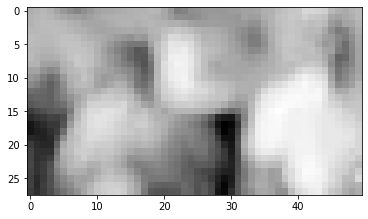

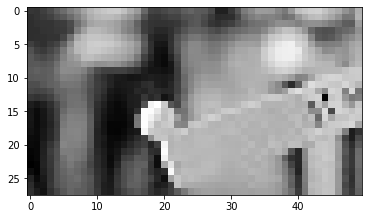

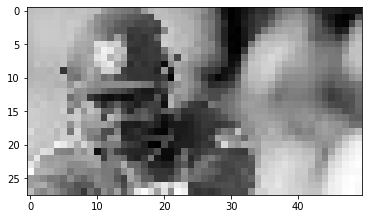

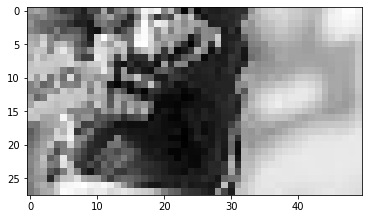

In [4]:
#different_sizes = [2,3,4,5]
#slice_size = random.choice(different_sizes)
res=slicer(kiu,2,2)
for i in res:
    #print(i.shape)
    plt.imshow(i,cmap='gray')
    plt.show()

In [5]:
#print(slice_size)

In [6]:
# Creating training data
X =[res[0],res[1],res[2],res[3]]
y = np.asarray([0,1,0,0])
x = np.asarray(X, dtype=np.float32)
x = np.expand_dims(x, axis=3)
#y = np.asarray(Y, dtype=np.float32)
#Y_test = np_utils.to_categorical(y_test, number_of_classes)

print(y.shape)
print(x.shape)

(4,)
(4, 28, 50, 1)


In [7]:
num_filters = 1

In [9]:
layers = [
    # input (N, 28, 50, 1) out (N, 28, 50, 32)
    Convolution2D.initialize(filters = num_filters, kernel_shape=(3,3, 1), stride=1, padding="same"),
    # input (N, 7, 7, 64) out (N, 7 * 7 * 64)
    Flatten(),
    # input (N, 7 * 7 * 64) out (N, 256)
    FullyConnected.initialize(units_prev=num_filters*x.shape[1]*x.shape[2], units_curr=256),
     # input (N, 32) out (N, 10)
    FullyConnected.initialize(units_prev=256, units_curr=x.shape[0]),
     # input (N, 10) out (N, 10)
    Softmax()
]

[[[[-0.11419931]]

  [[-0.05442502]]

  [[ 0.08712229]]]


 [[[-0.1919969 ]]

  [[ 0.08602706]]

  [[-0.03131194]]]


 [[[-0.05117569]]

  [[ 0.04958125]]

  [[-0.04531402]]]]


In [10]:
optimizer = Adam(lr=0.001)

In [11]:
model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [12]:
model.train(
    x_train=x,
    y_train=y,
    x_test=x,
    y_test=y,
    epochs=1,
    slicing = len(res),
    bs=1,
    verbose=True,
)

927.6539007541347
904.8599011407948
906.6209761861135
902.8666663122771
iter: 00001 | test loss: 46.05170 | test accuracy: 0.00000 | time: 00:00:00.41
